In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('./data/Airbnb_Open_Data.csv', index_col=False)
df.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_19236\2783059860.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('./data/Airbnb_Open_Data.csv', index_col=False)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.shape


(102599, 26)

In [6]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df.size

2667574

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [10]:
df.columns=[col.lower().replace(' ','_') for col in df.columns]
df.head(3)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [12]:
#calculate the %missing values

miss_value = df.isnull().sum()/df.shape[0]*100

#create data frame to show case the result
miss_value = pd.DataFrame({"Columns":miss_value.keys(),"%":miss_value})
miss_value.reset_index(drop=True, inplace=True)
miss_value

,Columns,%
0,id,0.000000
1,name,0.243667
2,host_id,0.000000
3,host_identity_verified,0.281679
4,host_name,0.395715
5,neighbourhood_group,0.028265
6,neighbourhood,0.015595
7,lat,0.007797
8,long,0.007797
9,country,0.518524


In [13]:
df['host_id'].unique().shape[0]/df['host_id'].shape[0]*100

99.47172974395461

In [14]:
#99.47% of data is host_id column is unique and its not useful better to remoce thies

df.drop(columns = ['host_id'], inplace = True)

In [15]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64

In [16]:
df['host_name'].value_counts()

host_name
Michael           881
David             764
John              581
Alex              546
Sonder (NYC)      516
                 ... 
Ujunwa              1
Richard Nelson      1
Omri-Dan            1
Yavuz               1
Shreen              1
Name: count, Length: 13190, dtype: int64

In [17]:
unique_host= df['host_name'].unique().shape[0]
print(f'%of unique value : {round(unique_host/df['host_name'].shape[0]*100,2)}')

%of unique value : 12.86


In [18]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [19]:
df['neighbourhood_group'].unique().shape[0]

8

In [20]:
df[['lat','long']].describe()

,lat,long
count,102591.000000,102591.000000
mean,40.728094,-73.949644
std,0.055857,0.049521
min,40.499790,-74.249840
25%,40.688740,-73.982580
50%,40.722290,-73.954440
75%,40.762760,-73.932350
max,40.916970,-73.705220


In [21]:
df['country'].unique()

array(['United States', nan], dtype=object)

In [22]:
df['country'].unique().shape[0]

2

In [23]:
df['country'].value_counts()

country
United States    102067
Name: count, dtype: int64

In [24]:
df.drop(columns=['country','country_code'], axis=1, inplace=True)


In [25]:
df.head()

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [26]:
df['instant_bookable'].value_counts()

instant_bookable
False    51474
True     51020
Name: count, dtype: int64

In [27]:
df['cancellation_policy'].value_counts()

cancellation_policy
moderate    34343
strict      34106
flexible    34074
Name: count, dtype: int64

In [28]:
print(f'% missing: {round(100-df['cancellation_policy'].count()/df.shape[0]*100,2)}%')

% missing: 0.07%


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room_type                       102599 non-null  object 
 11  construction_year               102385 non-null  float64
 12  price           

In [30]:
df.shape

(102599, 23)

In [31]:
df['cancellation_policy'].count()

np.int64(102523)

In [32]:
df['room_type'].value_counts()

room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

In [33]:
print(f'% missing: {round(100-df['room_type'].count()/df.shape[0]*100,2)}%')

% missing: 0.0%


In [34]:
df['construction_year'].value_counts(ascending=False)

construction_year
2014.0    5243
2008.0    5225
2006.0    5223
2019.0    5201
2009.0    5166
2020.0    5158
2010.0    5155
2022.0    5134
2005.0    5132
2012.0    5131
2003.0    5125
2007.0    5106
2015.0    5094
2017.0    5066
2011.0    5058
2018.0    5057
2021.0    5039
2004.0    5037
2013.0    5018
2016.0    5017
Name: count, dtype: int64

In [35]:
df['construction_year']=pd.to_datetime(df['construction_year'])

In [36]:
df['construction_year'].value_counts(ascending=False)

construction_year
1970-01-01 00:00:00.000002014    5243
1970-01-01 00:00:00.000002008    5225
1970-01-01 00:00:00.000002006    5223
1970-01-01 00:00:00.000002019    5201
1970-01-01 00:00:00.000002009    5166
1970-01-01 00:00:00.000002020    5158
1970-01-01 00:00:00.000002010    5155
1970-01-01 00:00:00.000002022    5134
1970-01-01 00:00:00.000002005    5132
1970-01-01 00:00:00.000002012    5131
1970-01-01 00:00:00.000002003    5125
1970-01-01 00:00:00.000002007    5106
1970-01-01 00:00:00.000002015    5094
1970-01-01 00:00:00.000002017    5066
1970-01-01 00:00:00.000002011    5058
1970-01-01 00:00:00.000002018    5057
1970-01-01 00:00:00.000002021    5039
1970-01-01 00:00:00.000002004    5037
1970-01-01 00:00:00.000002013    5018
1970-01-01 00:00:00.000002016    5017
Name: count, dtype: int64

In [37]:
df.drop(columns = ['construction_year'], inplace=True)

In [38]:
df.head()

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room_type                       102599 non-null  object 
 11  price                           102352 non-null  object 
 12  service_fee     

In [40]:
df['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [41]:
df['price'].str.strip()

0           $966
1           $142
2           $620
3           $368
4           $204
           ...  
102594      $844
102595      $837
102596      $988
102597      $546
102598    $1,032
Name: price, Length: 102599, dtype: object

In [42]:
df['price']=pd.to_numeric(df['price'].str.replace('[$,]','', regex=True))

In [43]:
df['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [44]:
print(f'% missing: {round(100-df['price'].count()/df.shape[0]*100,2)}%')

% missing: 0.24%


In [45]:
df['service_fee'].head()

0    $193 
1     $28 
2    $124 
3     $74 
4     $41 
Name: service_fee, dtype: object

In [46]:
df['service_fee']=pd.to_numeric(df['service_fee'].str.replace('[$,]','', regex=True))

In [47]:
print(f'% missing: {round(100-df['service_fee'].count()/df.shape[0]*100,2)}%')

% missing: 0.27%


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room_type                       102599 non-null  object 
 11  price                           102352 non-null  float64
 12  service_fee     

In [49]:
df['minimum_nights']=np.array(df['minimum_nights'], dtype=np.int16)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [50]:
df['minimum_nights'].astype('int64')

0         10
1         30
2          3
3         30
4         10
          ..
102594     1
102595     1
102596     3
102597     2
102598     1
Name: minimum_nights, Length: 102599, dtype: int64

In [51]:
#df['minimum_nights'].value_counts().sort_values(ascending=True)

In [52]:
#df['minimum_nights']=df['minimum_nights'].value_counts().sort_values(ascending=False)

#df['minimum_nights']

In [53]:
#df['number_of_reviews'].astype('int64')
df['number_of_reviews']=df['number_of_reviews'].fillna(0).astype('int64')

In [54]:
df['number_of_reviews'].value_counts()

number_of_reviews
0       15917
1       10408
2        7175
3        5375
4        4151
        ...  
1010        1
446         1
490         1
400         1
300         1
Name: count, Length: 476, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room_type                       102599 non-null  object 
 11  price                           102352 non-null  float64
 12  service_fee     

In [56]:
df['last_review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last_review, Length: 102599, dtype: object

In [57]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [58]:
df['last_review']

0        2021-10-19
1        2022-05-21
2               NaT
3        2019-07-05
4        2018-11-19
            ...    
102594          NaT
102595   2015-07-06
102596          NaT
102597   2015-10-11
102598          NaT
Name: last_review, Length: 102599, dtype: datetime64[ns]

In [59]:
df["review_rate_number"].value_counts()

review_rate_number
5.0    23369
4.0    23329
3.0    23265
2.0    23098
1.0     9212
Name: count, dtype: int64

In [60]:
df["review_rate_number"]=pd.to_numeric(df["review_rate_number"]).fillna(0).astype('int64')

In [61]:
df["review_rate_number"].value_counts()

review_rate_number
5    23369
4    23329
3    23265
2    23098
1     9212
0      326
Name: count, dtype: int64

In [62]:
df["calculated_host_listings_count"].value_counts()

calculated_host_listings_count
1.0     63429
2.0     14445
3.0      6577
4.0      3552
5.0      1995
        ...  
86.0       21
22.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 78, dtype: int64

In [63]:
df["availability_365"].describe()

count    102151.000000
mean        141.133254
std         135.435024
min         -10.000000
25%           3.000000
50%          96.000000
75%         269.000000
max        3677.000000
Name: availability_365, dtype: float64

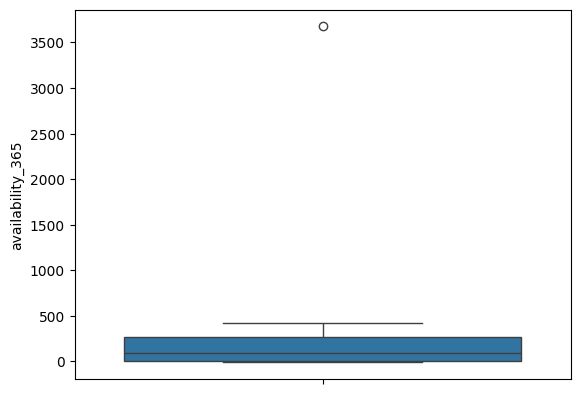

In [64]:
sns.boxplot(data=df['availability_365'])
plt.xticks(rotation=45)
plt.show()

In [65]:
#df['availability_365'] = df['availability_365'.(z_score < threshold).all(axis=1)]

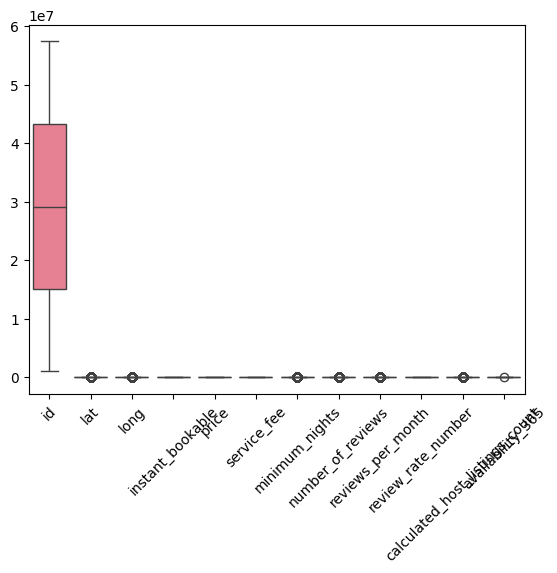

In [66]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [67]:
df['house_rules'].head()

0    Clean up and treat the home the way you'd like...
1    Pet friendly but please confirm with me if the...
2    I encourage you to use my kitchen, cooking and...
3                                                  NaN
4    Please no smoking in the house, porch or on th...
Name: house_rules, dtype: object

In [68]:
df['house_rules'].value_counts()

house_rules
#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [69]:
df['house_rules']=df['house_rules'].str.lower().str.title()

In [70]:
df['name']=df['name'].str.lower().str.title()

In [71]:
df['name']

0                       Clean & Quiet Apt Home By The Park
1                                    Skylit Midtown Castle
2                      The Village Of Harlem....New York !
3                                                      NaN
4         Entire Apt: Spacious Studio/Loft By Central Park
                                ...                       
102594                          Spare Room In Williamsburg
102595                       Best Location Near Columbia U
102596                      Comfy, Bright Room In Brooklyn
102597                    Big Studio-One Stop From Midtown
102598                                585 Sf Luxury Studio
Name: name, Length: 102599, dtype: object

In [72]:
df['name'].value_counts()

name
Home Away From Home                                 64
Private Room                                        44
Hillside Hotel                                      30
Water View King Bed Hotel Room                      30
Brooklyn Apartment                                  29
                                                    ..
Perfect For Your Parents + Garden                    1
West Village Nest - Superhost                        1
Wonderful Guest Bedroom In Manhattan For Singles     1
Lovely Room 1, Garden, Best Area, Legal Rental       1
Central Manhattan/Near Broadway                      1
Name: count, Length: 60664, dtype: int64

In [73]:
df['name'].nunique()

60664

In [74]:
df.sample(3)

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
98823,55581279,Brooklyn Tree House,verified,Anthony,Brooklyn,Williamsburg,40.71859,-73.95202,False,moderate,...,192.0,3,25,2019-07-05,2.62,3,1.0,30.0,I Feel Very Responsible And Accountable For Yo...,NaN
72822,41220927,Central Park/Ues,verified,Chloé,Manhattan,Upper East Side,40.77964,-73.95474,True,moderate,...,95.0,2,5,2018-06-16,0.11,1,1.0,0.0,NaN,NaN
23639,14057156,Bright Charming Studio On Upper East Side,verified,Inna,Manhattan,Upper East Side,40.76956,-73.95835,True,strict,...,99.0,30,8,2019-06-10,0.39,2,16.0,332.0,Please Remember That This Is A Residential Bui...,NaN


In [75]:
df.drop(columns=['house_rules','license'], axis=1, inplace=True)

In [107]:
#create a duncation to plot bar chart

def plot_bar_chart(df, column_name,top_values=None,hue=None,palette='viridis',show_grid=False, figsize=(10,6),bar_font_size=14,bar_angle=45,angle=85):
    #set up fig
    fig, ax = plt.subplots(figsize=figsize)

    #Get calue counts and filter if top value is specified
    counts=df[column_name].value_counts()
    if top_values:
        counts=counts.iloc[:top_values]

    #plot the bar chart
    sns.barplot(x=counts.index, y=counts.values, palette=hue, ax=ax)

    #Add labels to each bar
    for i, value in enumerate(counts.values):
        ax.text(i,value+0.05,f'{value}',ha='center',fontsize=bar_font_size, rotation =bar_angle)

    #Customize the plot
    ax.set_title(f"{column_name} Distribution", fontsize=20, fontweight='bold')
    ax.set_xlabel(column_name, fontsize=16)
    ax.set_ylabel("count",fontsize=14)
    plt.xticks(rotation=85, fontsize=14)
    if show_grid:
        plt.grid(axis='y', linestyle='--',alpha=0.7)

    plt.show()

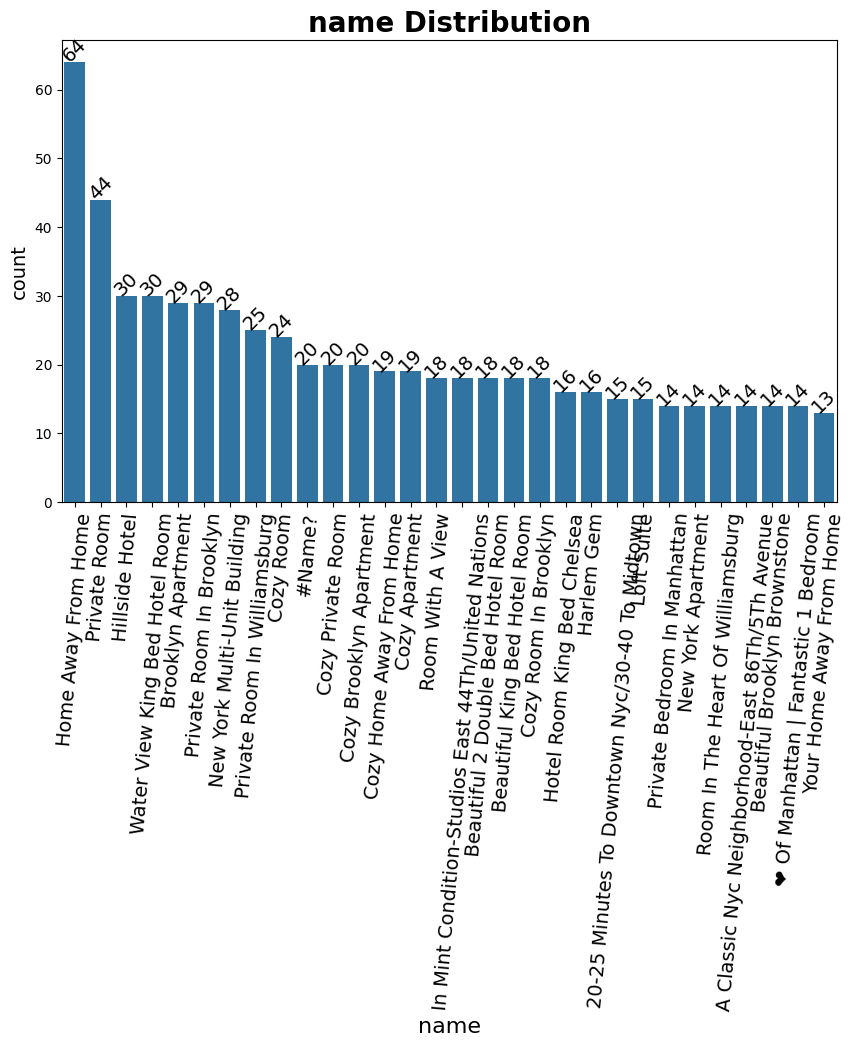

In [108]:
plot_bar_chart(df, 'name', top_values=30)

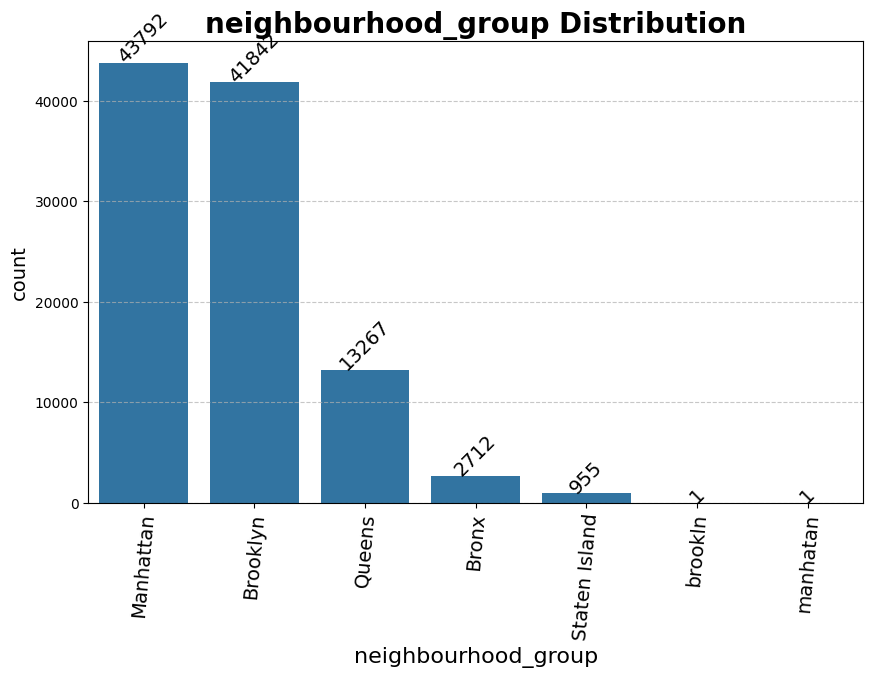

In [78]:
plot_bar_chart(df, 'neighbourhood_group', top_values=30)

In [79]:
def plot_donut_chart(df,name,title='Conut Chart', hole_size=0.3, figsize=(10,7),colors=None):
    counts=df[name].value_counts()
    data=counts.values.tolist()
    labels=counts.index.tolist()
    
    total = sum(data)
    percentages = [count / total * 100 for count in data]
    
    #labels=[label/labelss.sum()*100 for label in labelss]
    
    fig, ax =plt.subplots(figsize=figsize)
    wedges, text, autotexts= ax.pie(data,labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
    centre_circle=plt.Circle((0,0),color="white")
    fig.gca().add_artist(centre_circle)

    ax.axis('equal')
    plt.title(title, fontsize=20, fontweight='bold')
    for text in autotexts:
        text.set_size(12)
    plt.show()

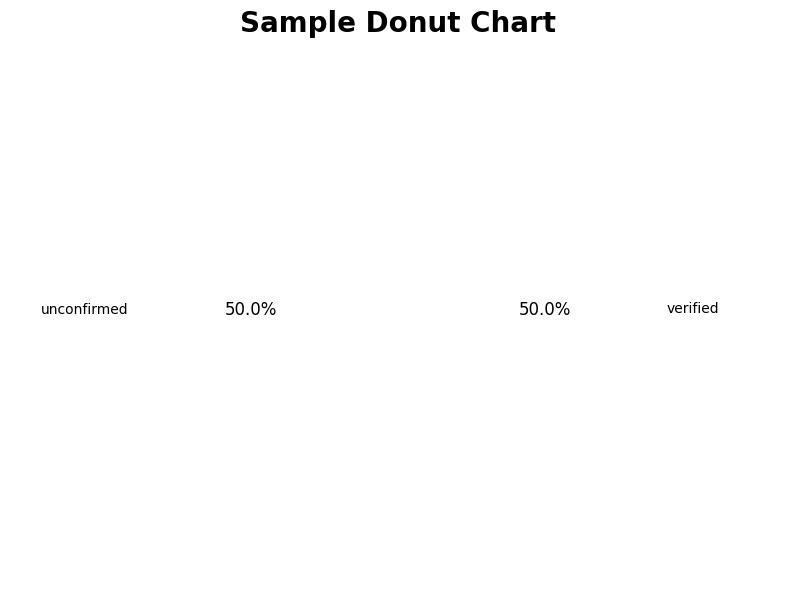

In [80]:
colors = ["#ff9999", "#66b3ff"]
plot_donut_chart(df,'host_identity_verified', title='Sample Donut Chart', colors=colors)

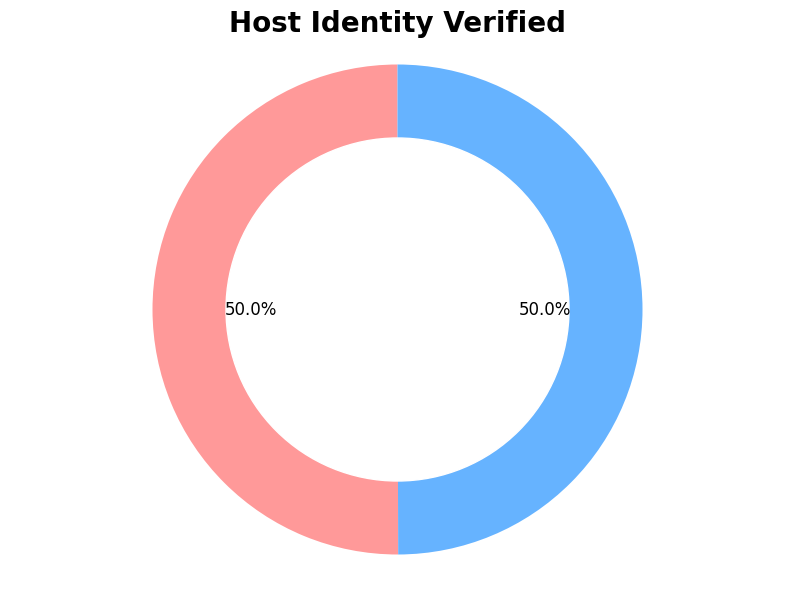

In [110]:
def plot_donut_chart(df1, column_name, title='Donut Chart', hole_size=0.7, figsize=(10, 7), colors=None):
    # Count occurrences of each unique value in the specified column
    counts = df1[column_name].value_counts()

    # Extract data and labels
    data = counts.values.tolist()  # Counts
    labels = counts.index.tolist()  # Unique values

    # Calculate total and percentages
    total = sum(data)
    percentages = [count / total * 100 for count in data]  # Calculate percentages

    # Create the donut chart
    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(data, labels=None,colors=colors, autopct='%1.1f%%', startangle=90)

    # Draw the center circle to create the donut effect
    centre_circle = plt.Circle((0, 0), hole_size, color="white")
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures the pie chart is circular
    ax.axis('equal')
    plt.title(title, fontsize=20, fontweight='bold')

    # Adjust the size of the text labels and show percentages
    for i, text in enumerate(autotexts):
        text.set_size(12)  # Set font size for percentage labels
        text.set_text(f'{percentages[i]:.1f}%')  # Update text to show percentage

    plt.show()

#
# Call the donut chart function
colors = ['#ff9999', '#66b3ff']  # Define colors for each wedge
plot_donut_chart(df, 'host_identity_verified', title='Host Identity Verified', colors=colors)

In [82]:


# create a function to plot pie/donut chart
def plot_pie_chart(column_name: str, startangle: int=45, loc: str="center", explodes: float=0.09, colors: list = None):
    values = df[column_name].value_counts()
    keys = values.keys()
    total_records = df[column_name].count()

    labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes/len(keys) for i in range(len(keys))]

    plt.subplots(figsize = (16, 9))
    # draw the pie chart
    patches, texts = plt.pie(values, startangle = startangle, explode = explodes, colors = colors)

    # draw circle
    center_circle = plt.Circle(xy = (0, 0), radius = 0.70, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.title(column_name, fontsize = 25, fontweight = "bold")
    plt.legend(patches, labels, loc=loc, fontsize = 14)
    plt.show()



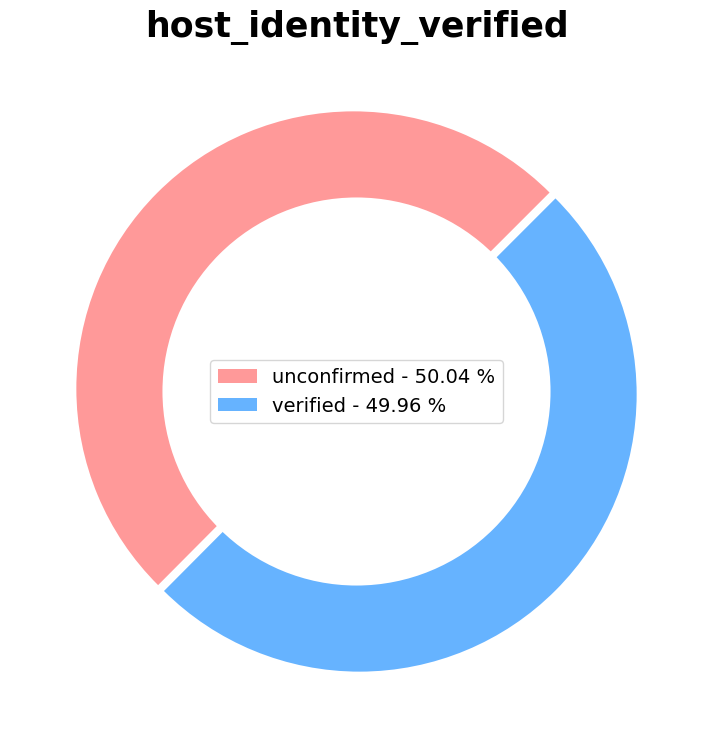

In [83]:
plot_pie_chart("host_identity_verified", explodes = 0.03, colors = ["#ff9999", "#66b3ff"])

In [84]:
dfc=df.copy()

In [85]:
dfc.head()

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & Quiet Apt Home By The Park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,966.0,193.0,10,9,2021-10-19,0.21,4,6.0,286.0
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,142.0,28.0,30,45,2022-05-21,0.38,4,2.0,228.0
2,1002403,The Village Of Harlem....New York !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,620.0,124.0,3,0,NaT,NaN,5,1.0,352.0
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,368.0,74.0,30,270,2019-07-05,4.64,4,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft By Central Park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,204.0,41.0,10,9,2018-11-19,0.10,3,1.0,289.0


In [86]:
dfc.drop(columns='id',inplace=True)

In [87]:
dfc.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,Clean & Quiet Apt Home By The Park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,966.0,193.0,10,9,2021-10-19,0.21,4,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,142.0,28.0,30,45,2022-05-21,0.38,4,2.0,228.0
2,The Village Of Harlem....New York !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,620.0,124.0,3,0,NaT,NaN,5,1.0,352.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,368.0,74.0,30,270,2019-07-05,4.64,4,1.0,322.0
4,Entire Apt: Spacious Studio/Loft By Central Park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,204.0,41.0,10,9,2018-11-19,0.10,3,1.0,289.0


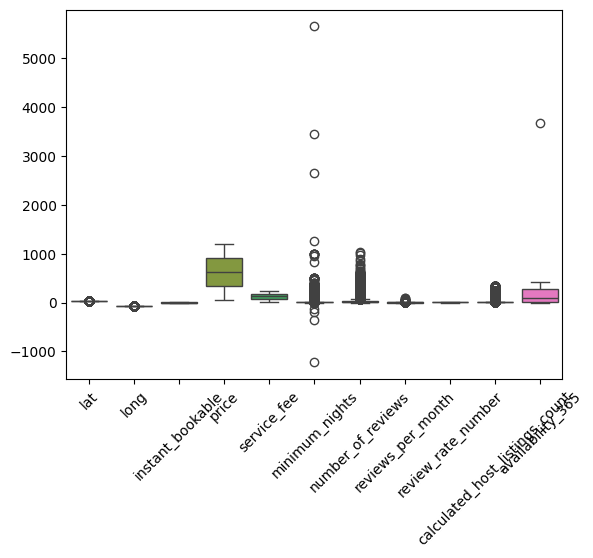

In [88]:
sns.boxplot(dfc)
plt.xticks(rotation=45)
plt.show()

In [89]:
dfc.describe()

,lat,long,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,102591.000000,102591.000000,102352.000000,102326.000000,102599.000000,102599.000000,86706,86720.000000,102599.000000,102280.000000,102151.000000
mean,40.728094,-73.949644,625.293536,125.026924,8.103412,27.434722,2019-06-12 03:40:52.065601024,1.374022,3.268687,7.936605,141.133254
min,40.499790,-74.249840,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,0.000000,1.000000,-10.000000
25%,40.688740,-73.982580,340.000000,68.000000,1.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.055857,0.049521,331.671614,66.325739,30.497129,49.478373,NaN,1.746621,1.295823,32.218780,135.435024


In [90]:
df1=dfc[['lat',	'long',	'price',	'service_fee',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'review_rate_number',	'calculated_host_listings_count',	'availability_365']]

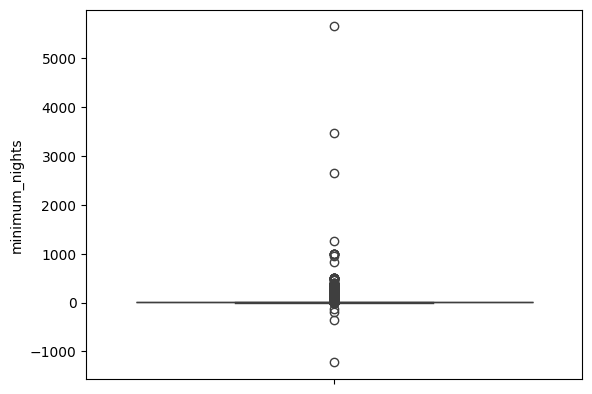

In [91]:
sns.boxplot(df['minimum_nights'])
plt.show()

In [92]:
def remove_outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr = q3-q1

    
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr

    print(column,lower_bound,upper_bound)
    rfilter=df[(df[column] >= lower_bound) & (df[column]<= upper_bound)]
    return rfilter

for column in df1.columns:
    dfc_clean=remove_outlier(df1,column)
    

dfc_clean
    

lat 40.57771000000001 40.87379
long -74.057925 -73.857005
price -519.5 1772.5
service_fee -104.5 355.5
minimum_nights -5.0 11.0
number_of_reviews -42.5 73.5
reviews_per_month -2.4499999999999997 4.67
review_rate_number -1.0 7.0
calculated_host_listings_count -0.5 3.5
availability_365 -396.0 668.0


,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,966.0,193.0,10,9,0.21,4,6.0,286.0
1,40.75362,-73.98377,142.0,28.0,30,45,0.38,4,2.0,228.0
2,40.80902,-73.94190,620.0,124.0,3,0,NaN,5,1.0,352.0
3,40.68514,-73.95976,368.0,74.0,30,270,4.64,4,1.0,322.0
4,40.79851,-73.94399,204.0,41.0,10,9,0.10,3,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...
102594,40.70862,-73.94651,844.0,169.0,1,0,NaN,3,1.0,227.0
102595,40.80460,-73.96545,837.0,167.0,1,1,0.02,2,2.0,395.0
102596,40.67505,-73.98045,988.0,198.0,3,0,NaN,5,1.0,342.0
102597,40.74989,-73.93777,546.0,109.0,2,5,0.10,3,1.0,386.0


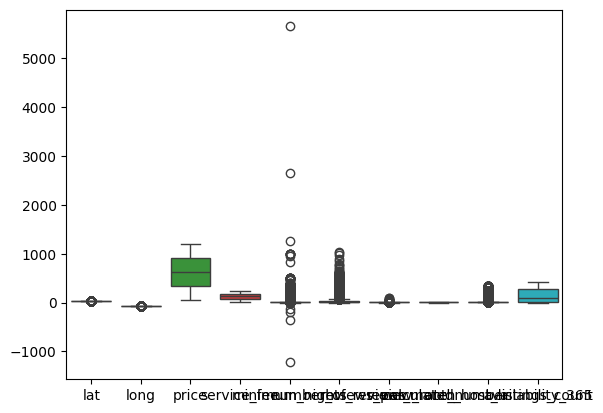

In [93]:
sns.boxplot(dfc_clean)
plt.show()

In [94]:
dfc_clean.describe()

,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,102142.000000,102142.000000,101903.000000,101877.000000,102150.000000,102150.000000,86532.000000,102150.000000,101831.000000,102150.000000
mean,40.728100,-73.949645,625.320197,125.032098,8.074283,27.396280,1.373737,3.268145,7.954464,141.098639
std,0.055862,0.049539,331.693473,66.330063,28.559616,49.282579,1.745303,1.295649,32.269988,134.983076
min,40.499790,-74.249840,50.000000,10.000000,-1223.000000,0.000000,0.010000,0.000000,1.000000,-10.000000
25%,40.688750,-73.982580,340.000000,68.000000,1.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,40.722295,-73.954450,625.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,40.762777,-73.932350,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [95]:
def remove_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"{column}: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Start with the full DataFrame and iteratively filter it
dfc_clean = df1.copy()
for column in df1.columns:
    dfc_clean = remove_outlier(dfc_clean, column)

dfc_clean


lat: Lower bound = 40.57771000000001, Upper bound = 40.87379
long: Lower bound = -74.05692500000002, Upper bound = -73.85872499999998
price: Lower bound = -517.0, Upper bound = 1771.0
service_fee: Lower bound = -104.5, Upper bound = 355.5
minimum_nights: Lower bound = -2.5, Upper bound = 9.5
number_of_reviews: Lower bound = -46.0, Upper bound = 82.0
reviews_per_month: Lower bound = -2.08, Upper bound = 4.0
review_rate_number: Lower bound = -1.0, Upper bound = 7.0
calculated_host_listings_count: Lower bound = -0.5, Upper bound = 3.5
availability_365: Lower bound = -306.0, Upper bound = 510.0


,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
5,40.74767,-73.97500,577.0,115.0,3,74,0.59,3,1.0,374.0
11,40.80316,-73.96545,606.0,121.0,5,53,0.43,4,1.0,163.0
21,40.71842,-73.95718,477.0,95.0,3,9,0.07,3,1.0,193.0
26,40.65599,-73.97519,530.0,106.0,1,19,1.37,5,2.0,344.0
35,40.68310,-73.95473,191.0,38.0,1,74,0.66,0,2.0,76.0
...,...,...,...,...,...,...,...,...,...,...
102587,40.71687,-73.94656,388.0,78.0,1,66,1.35,2,1.0,352.0
102591,40.77408,-73.98181,1139.0,228.0,5,17,0.35,5,1.0,134.0
102593,40.72826,-73.98422,1099.0,220.0,1,8,0.16,4,2.0,152.0
102595,40.80460,-73.96545,837.0,167.0,1,1,0.02,2,2.0,395.0


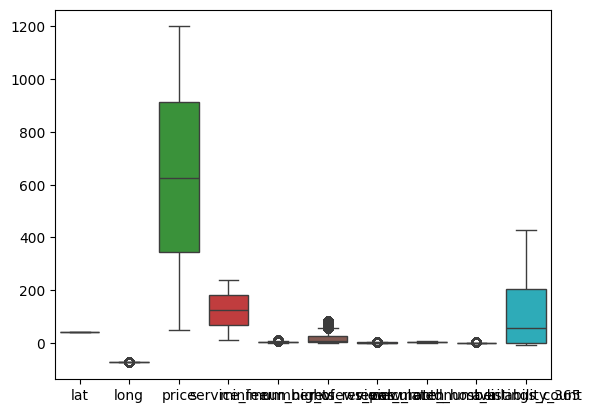

In [96]:
sns.boxplot(dfc_clean)
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sd=scaler.fit_transform(df1)
sd=pd.DataFrame(sd, columns=df1.columns)
sd

,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,-1.443059,-0.458917,1.027245,1.024842,0.062189,-0.372583,-0.666446,0.564365,-0.060108,1.069645
1,0.456997,-0.689122,-1.457152,-1.462892,0.717992,0.355011,-0.569115,0.564365,-0.184260,0.641394
2,1.448829,0.156377,-0.015960,-0.015483,-0.167342,-0.554482,NaN,1.336079,-0.215298,1.556966
3,-0.769007,-0.204278,-0.775752,-0.769342,0.717992,4.902474,1.869894,0.564365,-0.215298,1.335457
4,1.260667,0.114173,-1.270219,-1.266889,0.062189,-0.372583,-0.729425,-0.207349,-0.215298,1.091796
...,...,...,...,...,...,...,...,...,...,...
102594,-0.348643,0.063285,0.659410,0.662990,-0.232922,-0.554482,NaN,-0.207349,-0.215298,0.634010
102595,1.369697,-0.319178,0.638305,0.632835,-0.232922,-0.534271,-0.775228,-0.979064,-0.184260,1.874463
102596,-0.949650,-0.622080,1.093576,1.100228,-0.167342,-0.554482,NaN,1.336079,-0.215298,1.483130
102597,0.390218,0.239776,-0.239074,-0.241641,-0.200132,-0.453427,-0.729425,-0.207349,-0.215298,1.808011


In [98]:
z_score=np.abs((sd-sd.mean())/sd.std())
sd_outlier=sd[(z_score>3).any(axis=1)]
sd_outlier



,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
3,-0.769007,-0.204278,-0.775752,-0.769342,0.717992,4.902474,1.869894,0.564365,-0.215298,1.335457
8,0.658765,-0.712547,1.184028,1.190691,-0.200132,8.136226,1.200025,-0.207349,-0.215298,0.286978
12,0.584825,-0.788070,0.267454,0.270983,-0.200132,3.245177,0.072127,0.564365,-0.215298,0.862903
17,-0.651742,-0.448417,0.092581,NaN,-0.200132,3.447286,0.198085,1.336079,-0.215298,-0.333248
18,0.247531,-0.916097,-0.498367,NaN,-0.232922,4.700365,0.427100,-0.207349,-0.215298,1.357608
...,...,...,...,...,...,...,...,...,...,...
102528,0.716234,0.669089,-1.246099,-1.251812,3.013301,-0.514060,-0.763777,-0.207349,-0.215298,0.678312
102569,-1.061544,-0.585732,1.084531,1.085151,-0.232922,3.164333,1.423315,0.564365,-0.122184,1.963067
102580,0.674699,1.724600,-0.049126,-0.045637,-0.232922,3.669607,1.721034,-0.207349,-0.215298,0.951507
102584,-2.423970,3.225781,-0.178773,-0.181332,-0.200132,1.244293,0.255339,-0.979064,-0.215298,1.867080


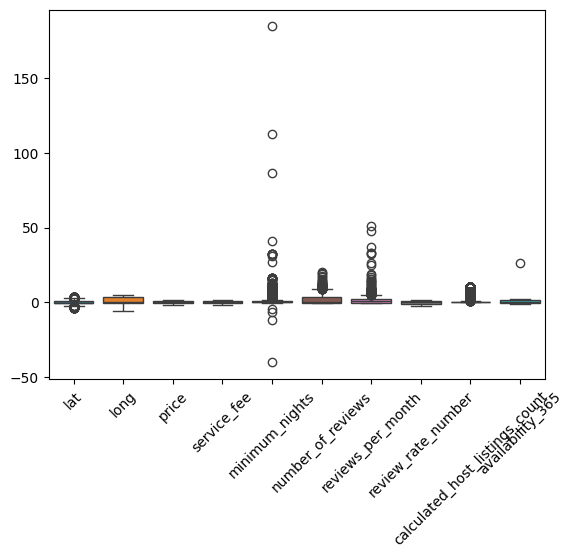

In [99]:
sns.boxplot(sd_outlier)
plt.xticks(rotation=45)
plt.show()

In [100]:
import numpy as np

# Calculate Z-scores for the entire DataFrame
z_scores = np.abs((sd - sd.mean()) / sd.std())

# Filter rows where any Z-score is greater than 3
sd_outlier = sd[(z_scores > 3).any(axis=1)]
sd_outlier



,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
3,-0.769007,-0.204278,-0.775752,-0.769342,0.717992,4.902474,1.869894,0.564365,-0.215298,1.335457
8,0.658765,-0.712547,1.184028,1.190691,-0.200132,8.136226,1.200025,-0.207349,-0.215298,0.286978
12,0.584825,-0.788070,0.267454,0.270983,-0.200132,3.245177,0.072127,0.564365,-0.215298,0.862903
17,-0.651742,-0.448417,0.092581,NaN,-0.200132,3.447286,0.198085,1.336079,-0.215298,-0.333248
18,0.247531,-0.916097,-0.498367,NaN,-0.232922,4.700365,0.427100,-0.207349,-0.215298,1.357608
...,...,...,...,...,...,...,...,...,...,...
102528,0.716234,0.669089,-1.246099,-1.251812,3.013301,-0.514060,-0.763777,-0.207349,-0.215298,0.678312
102569,-1.061544,-0.585732,1.084531,1.085151,-0.232922,3.164333,1.423315,0.564365,-0.122184,1.963067
102580,0.674699,1.724600,-0.049126,-0.045637,-0.232922,3.669607,1.721034,-0.207349,-0.215298,0.951507
102584,-2.423970,3.225781,-0.178773,-0.181332,-0.200132,1.244293,0.255339,-0.979064,-0.215298,1.867080


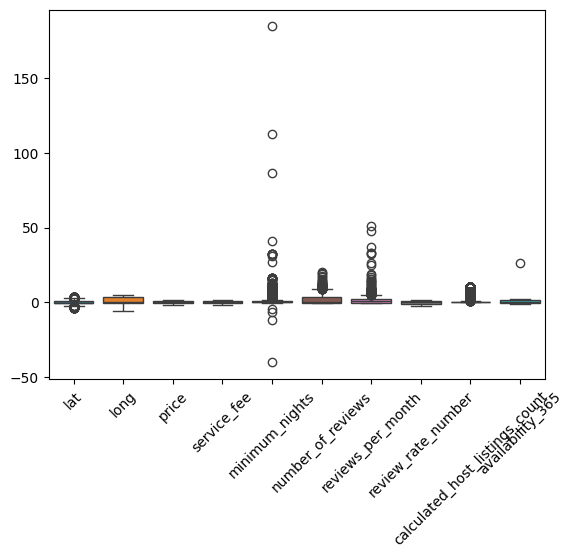

In [101]:
sns.boxplot(sd_outlier)
plt.xticks(rotation=45)
plt.show()

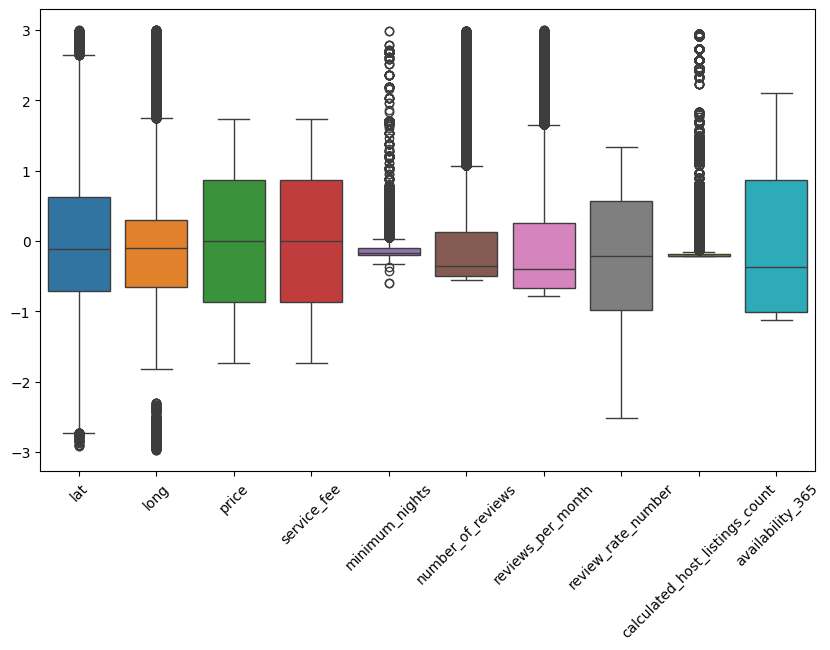

In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Z-scores for the entire DataFrame
z_scores = np.abs((sd - sd.mean()) / sd.std())

# Filter rows where all Z-scores are less than or equal to 3
sd_filtered = sd[(z_scores <= 3).all(axis=1)]

# Plot the filtered data to confirm outliers are removed
plt.figure(figsize=(10, 6))
sns.boxplot(data=sd_filtered)
plt.xticks(rotation=45)
plt.show()


In [103]:
def remove_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"{column}: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Start with the full DataFrame and iteratively filter it
dfc_clean1 = sd.copy()
for column in sd.columns:
    dfc_clean1 = remove_outlier(dfc_clean1, column)

dfc_clean1


lat: Lower bound = -2.692337689518763, Upper bound = 2.608412591373461
long: Lower bound = -2.16637375434864, Upper bound = 1.835966839543882
price: Lower bound = -3.444066569810756, Upper bound = 3.4543567015809384
service_fee: Lower bound = -3.4606179803284585, Upper bound = 3.474883288623917
minimum_nights: Lower bound = -0.34768728057216136, Upper bound = 0.045794293408779135
number_of_reviews: Lower bound = -1.4841854044371217, Upper bound = 1.102816052979997
reviews_per_month: Lower bound = -1.9775561047180261, Upper bound = 1.5034701977753944
review_rate_number: Lower bound = -3.294206414430068, Upper bound = 2.8795075096066296
calculated_host_listings_count: Lower bound = -0.26185493429318957, Upper bound = -0.1377031353301283
availability_365: Lower bound = -3.301475721678023, Upper bound = 2.7235831763582685


,lat,long,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
5,0.350473,-0.512026,-0.145607,-0.151178,-0.167342,0.941128,-0.448882,-0.207349,-0.215298,1.719407
11,1.343917,-0.319178,-0.058171,-0.060715,-0.101761,0.516699,-0.540488,0.564365,-0.215298,0.161456
21,-0.173192,-0.152179,-0.447112,-0.452721,-0.167342,-0.372583,-0.746601,-0.207349,-0.215298,0.382966
26,-1.290883,-0.515863,-0.287314,-0.286872,-0.232922,-0.170474,-0.002303,1.336079,-0.184260,1.497897
35,-0.805530,-0.102705,-1.309415,-1.312120,-0.232922,0.941128,-0.408804,-2.522492,-0.184260,-0.480921
...,...,...,...,...,...,...,...,...,...,...
102587,-0.200942,0.062276,-0.715451,-0.709033,-0.232922,0.779441,-0.013753,-0.979064,-0.215298,1.556966
102591,0.823294,-0.649543,1.548848,1.552543,-0.101761,-0.210896,-0.586291,1.336079,-0.215298,-0.052669
102593,0.002974,-0.698209,1.428246,1.431926,-0.232922,-0.392794,-0.695073,0.564365,-0.184260,0.080236
102595,1.369697,-0.319178,0.638305,0.632835,-0.232922,-0.534271,-0.775228,-0.979064,-0.184260,1.874463


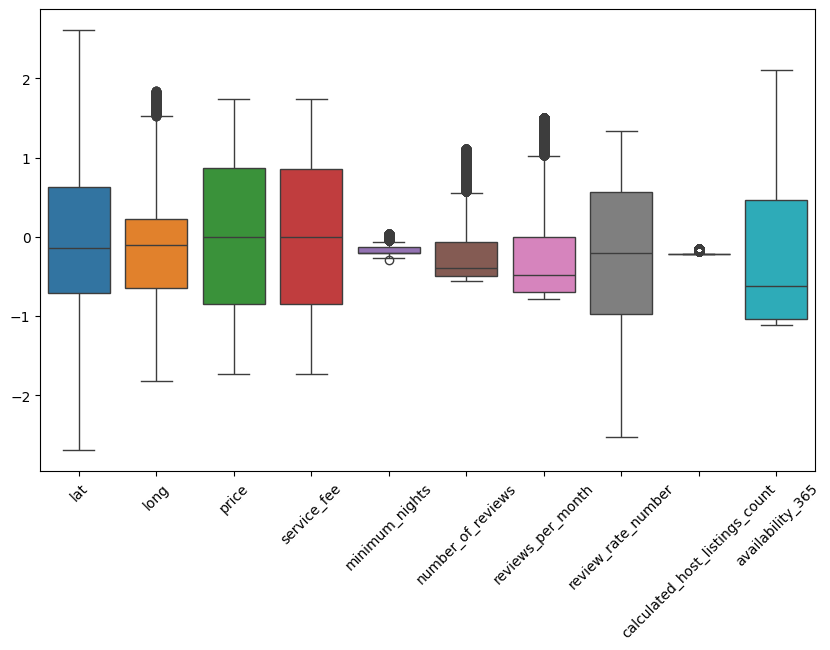

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfc_clean1)
plt.xticks(rotation=45)
plt.show()